### Importing Required Libraries  
In this section, we import the essential libraries for data analysis and preprocessing:  
- **pandas** for handling data and DataFrames  
- **numpy** for numerical operations  
- **matplotlib.pyplot** for plotting and visualization  
- **StandardScaler** from sklearn for data normalization

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Loading and Preparing the Data  
In this section, we load the data from the `boston_house_prices.csv` file. The first row of the data is then removed (because it contains headers), and the index is reset.

In [235]:
fileName='boston_house_prices.csv'
dataframe = pd.read_csv(fileName)
print(dataframe[['LSTAT', 'MEDV']].head())

   LSTAT  MEDV
0   4.98  24.0
1   9.14  21.6
2   4.03  34.7
3   2.94  33.4
4   5.33  36.2



### Normalizing the LSTAT and MEDV Columns  
In this step, the `LSTAT` (percentage of lower status population) and `MEDV` (median value of homes) columns are normalized using the StandardScaler. This scales the data so that each column has a mean of zero and a standard deviation of one. Such preprocessing is important for training machine learning models.

In [236]:
scaler = StandardScaler()
dataframe['LSTAT'] = scaler.fit_transform(dataframe[['LSTAT']])
print(dataframe[['LSTAT', 'MEDV']].head())


      LSTAT  MEDV
0 -1.075562  24.0
1 -0.492439  21.6
2 -1.208727  34.7
3 -1.361517  33.4
4 -1.026501  36.2



### Feature Preparation and Adding Bias  
In this section, the `LSTAT` column is selected as the input feature (`X`), and `MEDV` as the target (`y`).  
To implement linear regression, a column of ones is added to the feature matrix; this column serves as the **bias** term.
The bias allows the regression line to fit the data more flexibly, without being forced through the origin. It essentially lets the model learn a constant (intercept) along with the slope.


In [237]:
X = dataframe['LSTAT'].values.reshape(-1, 1)
y = dataframe['MEDV'].values

ones = np.ones((X.shape[0], 1))
X_b = np.hstack([ones, X])  
print(X_b[:5])

[[ 1.         -1.0755623 ]
 [ 1.         -0.49243937]
 [ 1.         -1.2087274 ]
 [ 1.         -1.36151682]
 [ 1.         -1.02650148]]


### Initializing Parameters and Gradient Descent Settings  
In this part, the model parameters (`theta`) are initialized with zeros.  
The learning rate (`learning_rate`) and the number of epochs (iterations) for running the gradient descent algorithm are also defined.  
- The learning rate controls how much the parameters are updated in each iteration.  
- The number of epochs determines how many times the gradient descent algorithm will run to learn the parameters.

In [238]:
theta = np.zeros(X_b.shape[1]) 

learning_rate = 0.01
epochs = 1000

### Running Gradient Descent and Tracking Cost History  
In this section, the **gradient descent** algorithm is used to optimize the model parameters.  
In each epoch (iteration):  
- The model’s prediction (`yHat`) is calculated by multiplying the feature matrix with the parameters.  
- The `error` is computed as the difference between the predicted and actual values.  
- The cost (`cost`) is recorded as the sum of squared differences (SSE) between model predictions and actual values.
- Gradients (the derivatives with respect to each parameter) are calculated, and the parameters are updated in the direction that reduces the error.  
- Every 100 epochs, the cost is printed to monitor the learning progress.

In [239]:
m = len(y)
cost_history = []

for epoch in range(epochs):
    yHat = X_b.dot(theta)
    error = yHat - y  

    cost = np.sum(error**2)
    cost_history.append(cost)

    gradients = (1 / m) * X_b.T.dot(error)
    theta = theta - learning_rate * gradients

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost {cost:.4f}")

Epoch 0: Cost 299626.3400
Epoch 100: Cost 57007.3177
Epoch 200: Cost 24501.3000
Epoch 300: Cost 20146.1543
Epoch 400: Cost 19562.6533
Epoch 500: Cost 19484.4760
Epoch 600: Cost 19474.0018
Epoch 700: Cost 19472.5985
Epoch 800: Cost 19472.4105
Epoch 900: Cost 19472.3853


### Plotting the SSE Trend During Gradient Descent  
In this section, the trend of **SSE (Sum of Squared Errors)** during the gradient descent process is visualized.  
The plot shows how the model reduces the error in each epoch, moving toward an optimal solution. A steadily decreasing SSE usually indicates that the model is learning effectively.

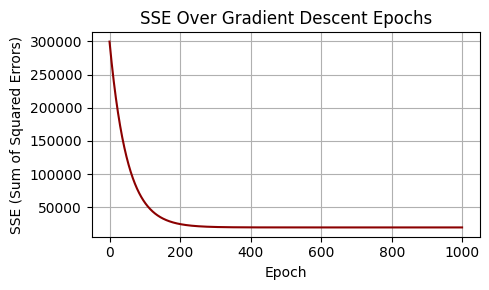

In [240]:
plt.figure(figsize=(5, 3))
plt.plot(range(epochs), cost_history, color='darkred')
plt.xlabel('Epoch')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('SSE Over Gradient Descent Epochs')
plt.grid(True)
plt.tight_layout()
plt.show()


### Displaying the Final Model Output (SSE and Parameters)
In this part, the final **SSE (Sum of Squared Errors)** and the model’s learned parameters (`theta`) are printed after the gradient descent has completed.  
- The first output shows the total error of the model during training.
- The second output displays the parameters learned by the model, which can be used for prediction.

In [241]:
print(f"SSE: {cost_history[-1]:.4f}")
print(f"Final parameters (theta): {theta}")


SSE: 19472.3820
Final parameters (theta): [22.53183355 -6.77736104]


### Visualizing the Regression Line on Actual Data  
In this section, the actual data points (LSTAT and MEDV) are plotted as blue dots, and the learned regression line is shown in red.  
This visualization helps you see how well the regression line fits the data. If the red line passes well through the blue points, it indicates a good fit of the model to the data.

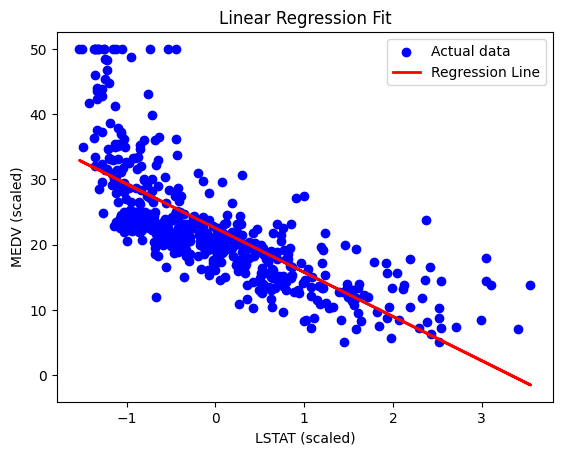

In [242]:
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, X_b.dot(theta), color='red', linewidth=2, label='Regression Line')
plt.xlabel('LSTAT (scaled)')
plt.ylabel('MEDV (scaled)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

### Predicting House Price for a New LSTAT Value  
In this section, the model parameters (`w0` and `w1`) and a new `LSTAT` value are used to predict `MEDV`. The new input is first normalized, then the linear regression formula is used to calculate the prediction.  
Finally, both the predicted and the actual values are shown to help assess the model’s performance.

In [243]:
w0, w1 = theta
new_lstat = 4.98
df_new = pd.DataFrame([[new_lstat]], columns=['LSTAT'])
x_norm = scaler.transform(df_new)[0, 0]
y_pred = w0 + w1 * x_norm
print(f"Predicted MEDV = w0 + w1·x_norm = {w0:.4f} + {w1:.4f}*{x_norm:.4f} = {y_pred:.2f} (when LSTAT = {new_lstat}) and the actual value is {dataframe['MEDV'].iloc[0]:.2f}")


Predicted MEDV = w0 + w1·x_norm = 22.5318 + -6.7774*-1.0756 = 29.82 (when LSTAT = 4.98) and the actual value is 24.00



### Dropping the MEDV Column to Prepare Features  
At this stage, the `MEDV` column (target variable) is removed from the dataframe, leaving only the features. This ensures that normalization is performed only on the input features and not on the target variable.

In [244]:
X = dataframe.drop(columns=['MEDV'])
print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B     LSTAT  
0  396.90 -1.075562  
1  396.90 -0.492439  
2  392.83 -1.208727  
3  394.63 -1.361517  
4  396.90 -1.026501  



### Normalizing All Features using StandardScaler  
In this section, all features are normalized using `StandardScaler` so that they have a mean of zero and a standard deviation of one. This helps the model to learn more efficiently.


In [245]:
X_normalized = scaler.fit_transform(X)

### Adding Bias Column to Normalized Features  
Here, a column of ones is added to the beginning of the normalized features matrix as the bias term. This allows the model to learn an intercept and produce a more flexible output.

In [246]:
X_b = np.c_[np.ones((len(X_normalized), 1)), X_normalized]  
print(X_b[:5])

[[ 1.         -0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743
   0.41367189 -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038
   0.44105193 -1.0755623 ]
 [ 1.         -0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221
   0.19427445  0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415
   0.44105193 -0.49243937]
 [ 1.         -0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221
   1.28271368 -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415
   0.39642699 -1.2087274 ]
 [ 1.         -0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384
   1.01630251 -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321
   0.41616284 -1.36151682]
 [ 1.         -0.41248185 -0.48772236 -1.30687771 -0.27259857 -0.83528384
   1.22857665 -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321
   0.44105193 -1.02650148]]


### Running Gradient Descent with Error History Tracking  
Here, the gradient descent algorithm for multivariate linear regression is implemented, and the SSE (Sum of Squared Errors) is recorded at each iteration.  
This allows you to analyze how the error decreases and to assess the model’s learning quality.

In [247]:
m = len(X_b) 
theta = np.random.rand(X_b.shape[1])
cost_history = []
for iteration in range(epochs):
    y_hat = X_b.dot(theta)
    errors = y_hat - y
    sse = np.sum(errors ** 2)
    cost_history.append(sse)
    gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients


### Plotting Gradient Descent Convergence  
This plot shows how the SSE changes over the epochs of training. It helps you assess whether the model is learning correctly and if the error is decreasing as expected.

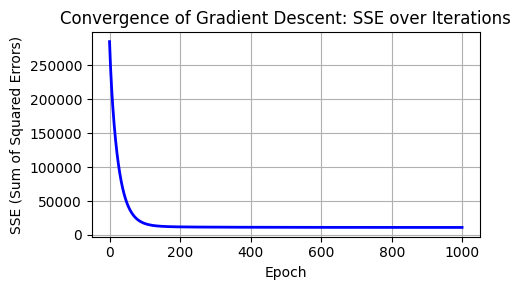

In [248]:
plt.figure(figsize=(5, 3))
plt.plot(range(epochs), cost_history, color='blue', lw=2)
plt.title('Convergence of Gradient Descent: SSE over Iterations')
plt.xlabel('Epoch')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Displaying Final Error and Model Parameters  
After training is complete, the final SSE and the learned model parameters (theta) are displayed. These numbers serve as indicators of model performance and are used for future predictions.

In [249]:
print(f"SSE: {cost_history[-1]:.4f}")
print(f"Final parameters (theta): {theta}")

SSE: 11117.2417
Final parameters (theta): [22.53280629 -0.86264265  0.96970764 -0.12171747  0.71899932 -1.91164755
  2.7481586  -0.03455096 -3.03652102  1.96942695 -1.33179028 -2.01779048
  0.8507461  -3.71273146]


### Actual vs. Predicted Plot
This scatter plot compares the actual values against the predicted MEDV values. The closeness of the points to the dashed red line (y = x) indicates good model accuracy.

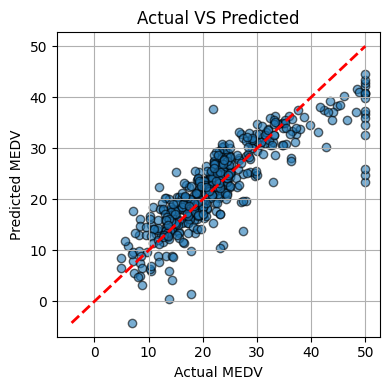

In [250]:
y_pred = X_b.dot(theta) 

plt.figure(figsize=(4, 4))
plt.scatter(y, y_pred, alpha=0.6, edgecolor='k')
# خط  y = x
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual VS Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

### Bar Chart of Feature Coefficients in Multivariate Regression
This bar chart shows the magnitude and direction of each feature’s effect on the predicted value. Positive coefficients increase the prediction, while negative coefficients decrease it.

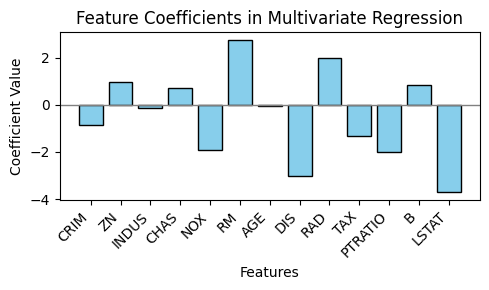

In [251]:
feature_names = list(X.columns) 
coefficients  = theta[1:]    

plt.figure(figsize=(5, 3))
bars = plt.bar(feature_names, coefficients, color='skyblue', edgecolor='k')
plt.axhline(0, color='gray', linewidth=1)

plt.xticks(rotation=45, ha='right')
plt.title("Feature Coefficients in Multivariate Regression")
plt.xlabel("Features")  
plt.ylabel("Coefficient Value")

plt.tight_layout()
plt.show()

### Residuals vs. Predicted Values Plot  
This plot shows the residuals against the predicted values, helping you evaluate the error distribution of your model predictions. Random scatter around zero indicates a well-fitting model.

### Why is the Residuals Plot Important?
This is a valuable diagnostic tool for linear regression models. Random scatter of points around zero means your model is appropriate. Systematic patterns suggest the need to improve your model, add features, or try more advanced approaches.

Purpose of the Residuals Plot

This plot is a key diagnostic tool for evaluating the quality and validity of a regression model.

On this chart, the X-axis shows the predicted values (Predicted MEDV), and the Y-axis shows the residuals (Actual - Predicted).

What Should You Look for?

Random Scatter: If the linear model is appropriate and core regression assumptions hold (like linearity and homoscedasticity), the points should be randomly distributed around the zero horizontal line with no clear pattern.
Presence of Patterns:
If the points form a curve (such as a U or inverted U shape), this suggests a nonlinear relationship between features and the target variable.
If the spread of residuals widens or narrows as predicted values increase (fan or funnel shape), it’s a sign of heteroscedasticity (uneven error variance).
If many points are far from zero, it might signal overfitting or underfitting by the model.
Practical Use:

Reviewing this plot helps you understand if your model performs well across all data ranges.
It can indicate if you should try a more flexible model (nonlinear, Ridge/Lasso regression, etc.) or if you need to address outliers, add new features, or investigate potential data issues.

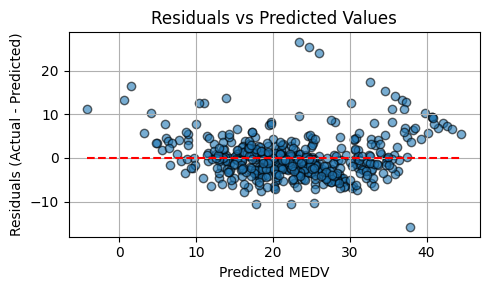

In [252]:
residuals = y - y_pred

plt.figure(figsize=(5, 3))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolor='k')
plt.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='dashed')

plt.xlabel("Predicted MEDV")                     
plt.ylabel("Residuals (Actual - Predicted)")     
plt.title("Residuals vs Predicted Values")       
plt.grid(True)
plt.tight_layout()
plt.show()

### Predicting MEDV for a New Sample  
Here, the actual and predicted house prices are compared for the first row in the dataframe, providing a practical check on model prediction quality.

In [253]:
new_sample = dataframe.iloc[[0], :-1]
new_sample_norm = scaler.transform(new_sample)
new_sample_b = np.c_[np.ones((new_sample_norm.shape[0], 1)), new_sample_norm]  
y_hat_new = new_sample_b.dot(theta)
print(f"Predicted MEDV for first row sample: {y_hat_new[0]:.2f} (thousands of dollars)")
print(f"Actual MEDV                     : {dataframe.iloc[0, -1]:.2f} (thousands of dollars)")

Predicted MEDV for first row sample: 30.39 (thousands of dollars)
Actual MEDV                     : 24.00 (thousands of dollars)


### Prediction Using the Linear Equation  
Here, the predicted value is calculated by adding the bias and multiplying each sample feature by its respective coefficient. This yields the same result as matrix multiplication, but demonstrates each step explicitly.

In [255]:
x = new_sample_norm.flatten()

y_pred_line = theta[0]
for coef, xi in zip(theta[1:], x):
    y_pred_line += coef * xi

print(f"Predicted MEDV (linear eq.): {y_pred_line:.2f}")
print(f"Actual   MEDV                : {dataframe.iloc[0, -1]:.2f}")

Predicted MEDV (linear eq.): 30.39
Actual   MEDV                : 24.00
